In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [4]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 30s 3us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
X_train[0].shape

(28, 28)

In [11]:
y_train.shape

(60000,)

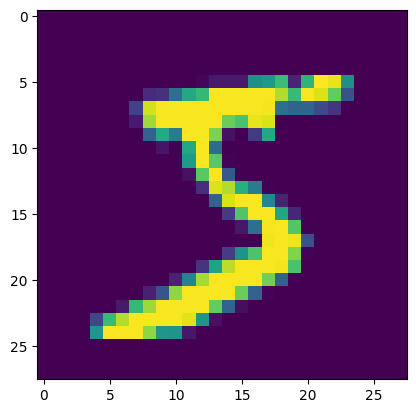

In [12]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [14]:
X_train = X_train/255
X_test = X_test/255

In [28]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [31]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2940 - accuracy: 0.9125 - val_loss: 0.1495 - val_accuracy: 0.9562
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1207 - accuracy: 0.9634 - val_loss: 0.1114 - val_accuracy: 0.9673
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0851 - accuracy: 0.9748 - val_loss: 0.1081 - val_accuracy: 0.9690
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0644 - accuracy: 0.9798 - val_loss: 0.0900 - val_accuracy: 0.9723
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0497 - accuracy: 0.9850 - val_loss: 0.0963 - val_accuracy: 0.9712
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0411 - accuracy: 0.9869 - val_loss: 0.1013 - val_accuracy: 0.9719
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0319 - accuracy: 0.9899 - val_loss: 0.1112 - val_accuracy:

In [32]:
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 986us/step


In [33]:
y_pred = y_prob.argmax(axis = 1)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9788

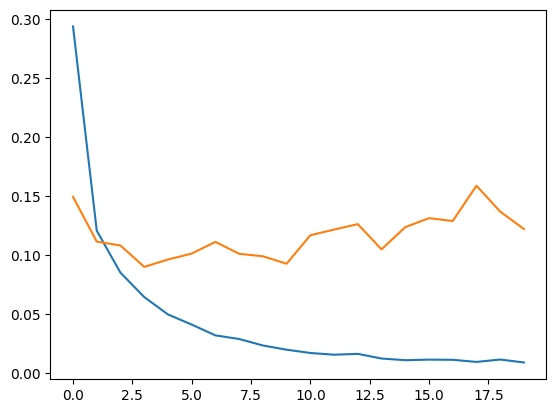

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

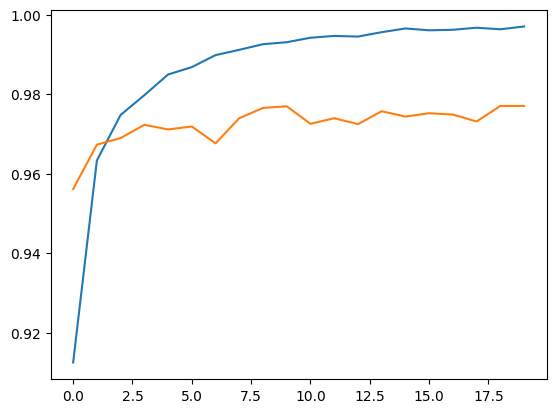

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

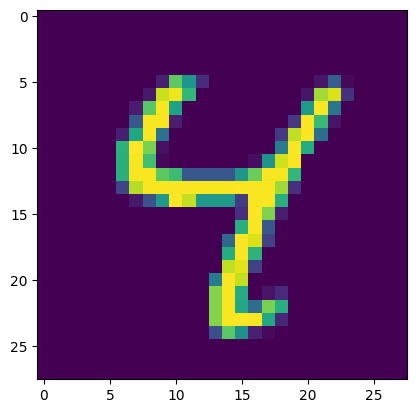

In [45]:
plt.imshow(X_test[6])

In [46]:
model.predict(X_test[6].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 15ms/step


array([4], dtype=int64)